In [54]:
#import the libraries
import pandas as pd
import warnings

In [55]:
warnings.filterwarnings('ignore')

In [56]:
#read the dataset
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
df.shape

(301, 9)

Selling price is our target variable as according to the different parameters of the car, we determine how much is sold.  

In [58]:
#Find the unique values of all the categorical features
for i in range(df.columns.get_loc('Fuel_Type'),df.columns.get_loc('Owner')+1):
    print(df[df.columns[i]].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [59]:
#Check missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [60]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [61]:
df.insert(2,'Years_elapsed',2020 - df['Year'])

In [62]:
df.head()

,Car_Name,Year,Years_elapsed,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [63]:
df.columns

Index(['Car_Name', 'Year', 'Years_elapsed', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [64]:
final_df = df[['Year', 'Years_elapsed', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [65]:
final_df.head()

,Year,Years_elapsed,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [66]:
#Dropping the year column
final_df.drop('Year',axis = 1,inplace = True)

In [67]:
final_df.head()

,Years_elapsed,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
final_df = pd.get_dummies(final_df,drop_first=True,)

In [69]:
final_df.head()

,Years_elapsed,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [74]:
final_df.corr()[(final_df.corr()>0.5)| (final_df.corr()<-0.5)]

,Years_elapsed,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Years_elapsed,1.000000,NaN,NaN,0.524342,NaN,NaN,NaN,NaN,NaN
Selling_Price,NaN,1.000000,0.878983,NaN,NaN,0.552339,-0.540571,-0.550724,NaN
Present_Price,NaN,0.878983,1.000000,NaN,NaN,NaN,NaN,-0.512030,NaN
Kms_Driven,0.524342,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Owner,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Fuel_Type_Diesel,NaN,0.552339,NaN,NaN,NaN,1.000000,-0.979648,NaN,NaN
Fuel_Type_Petrol,NaN,-0.540571,NaN,NaN,NaN,-0.979648,1.000000,NaN,NaN
Seller_Type_Individual,NaN,-0.550724,-0.512030,NaN,NaN,NaN,NaN,1.000000,NaN
Transmission_Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [79]:
#import seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

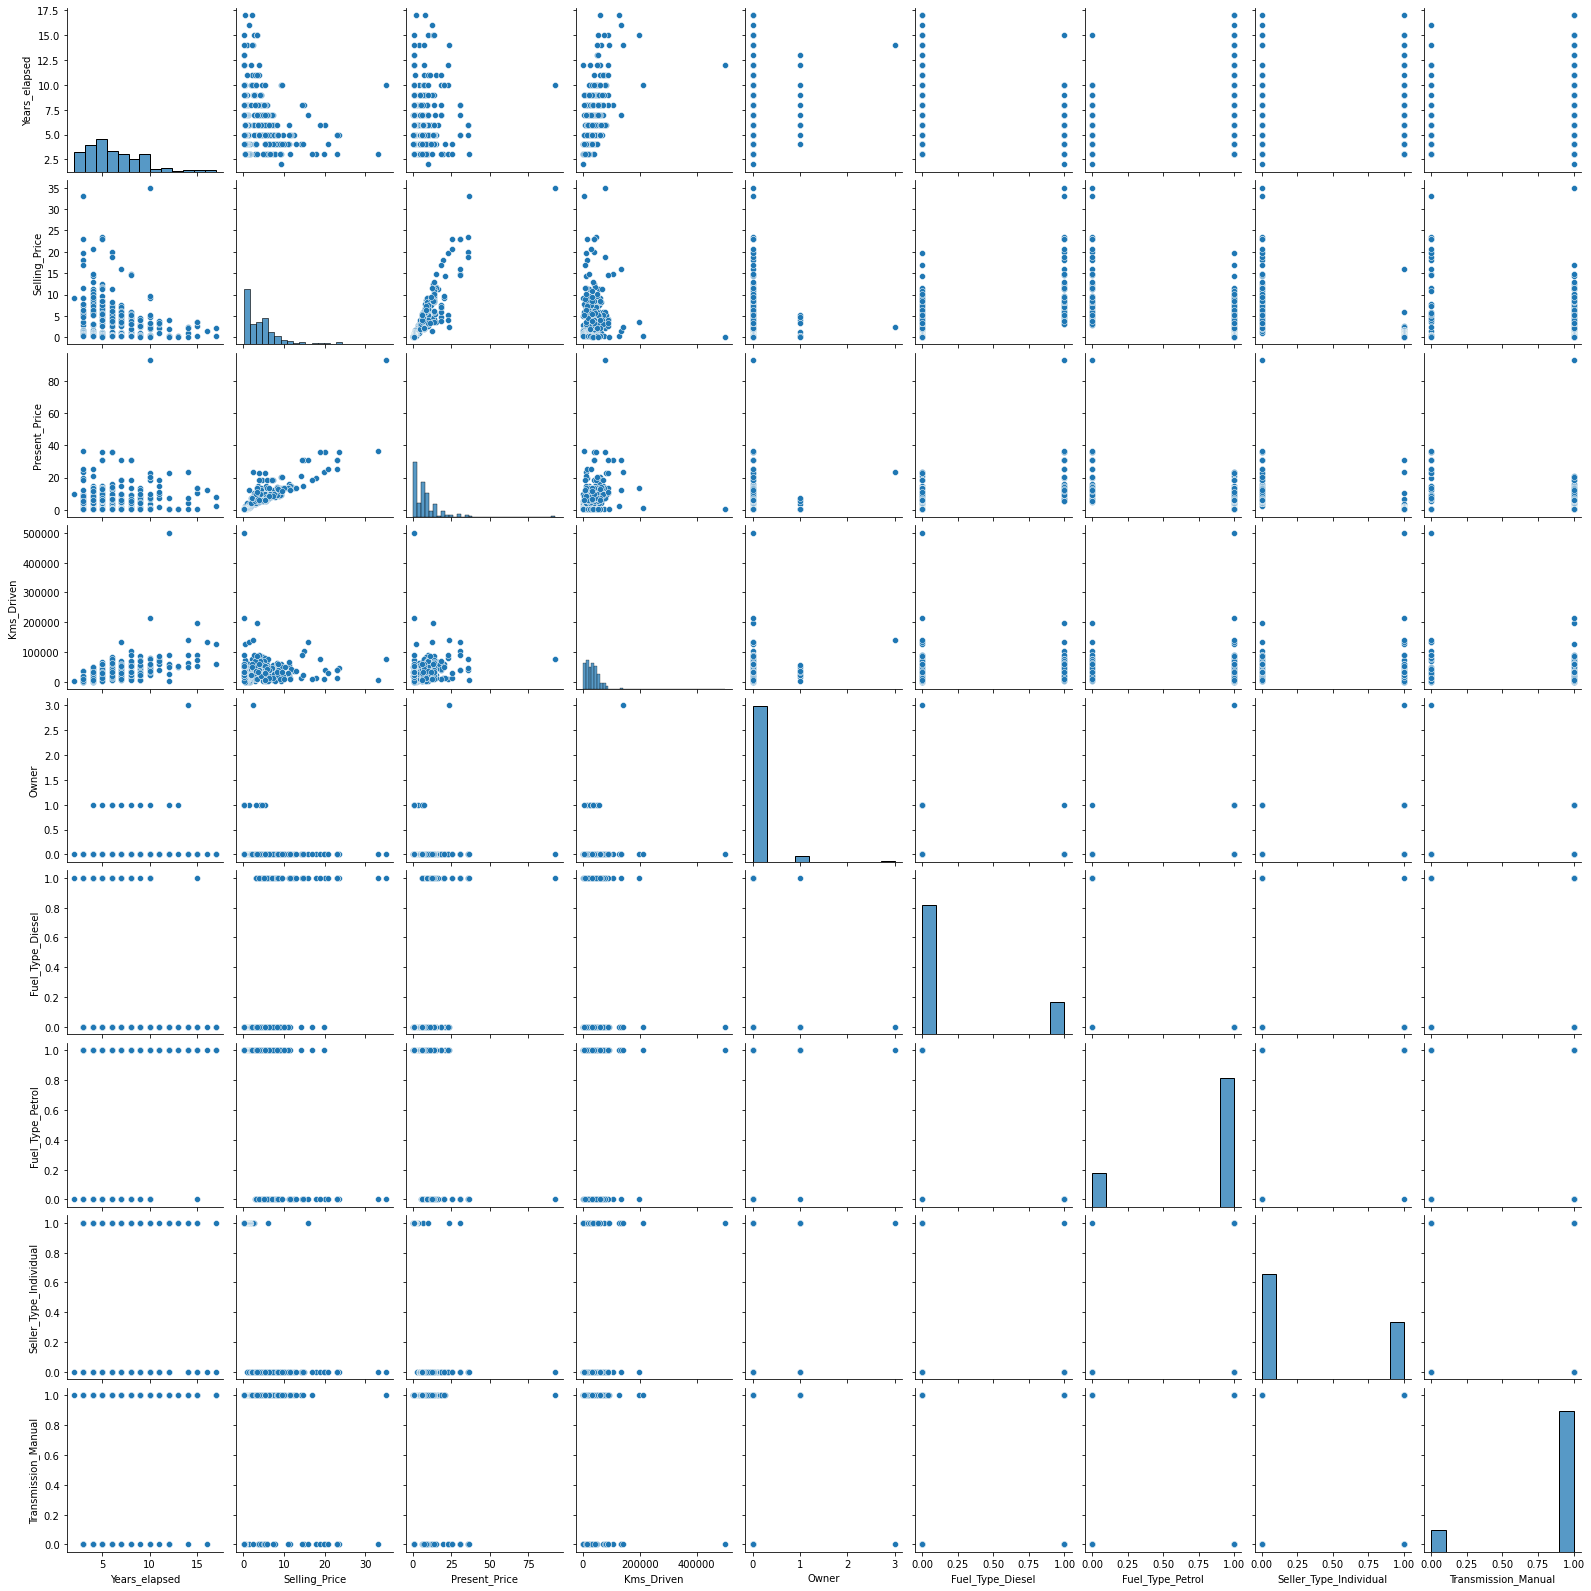

In [80]:
sns.pairplot(final_df)

<AxesSubplot:>

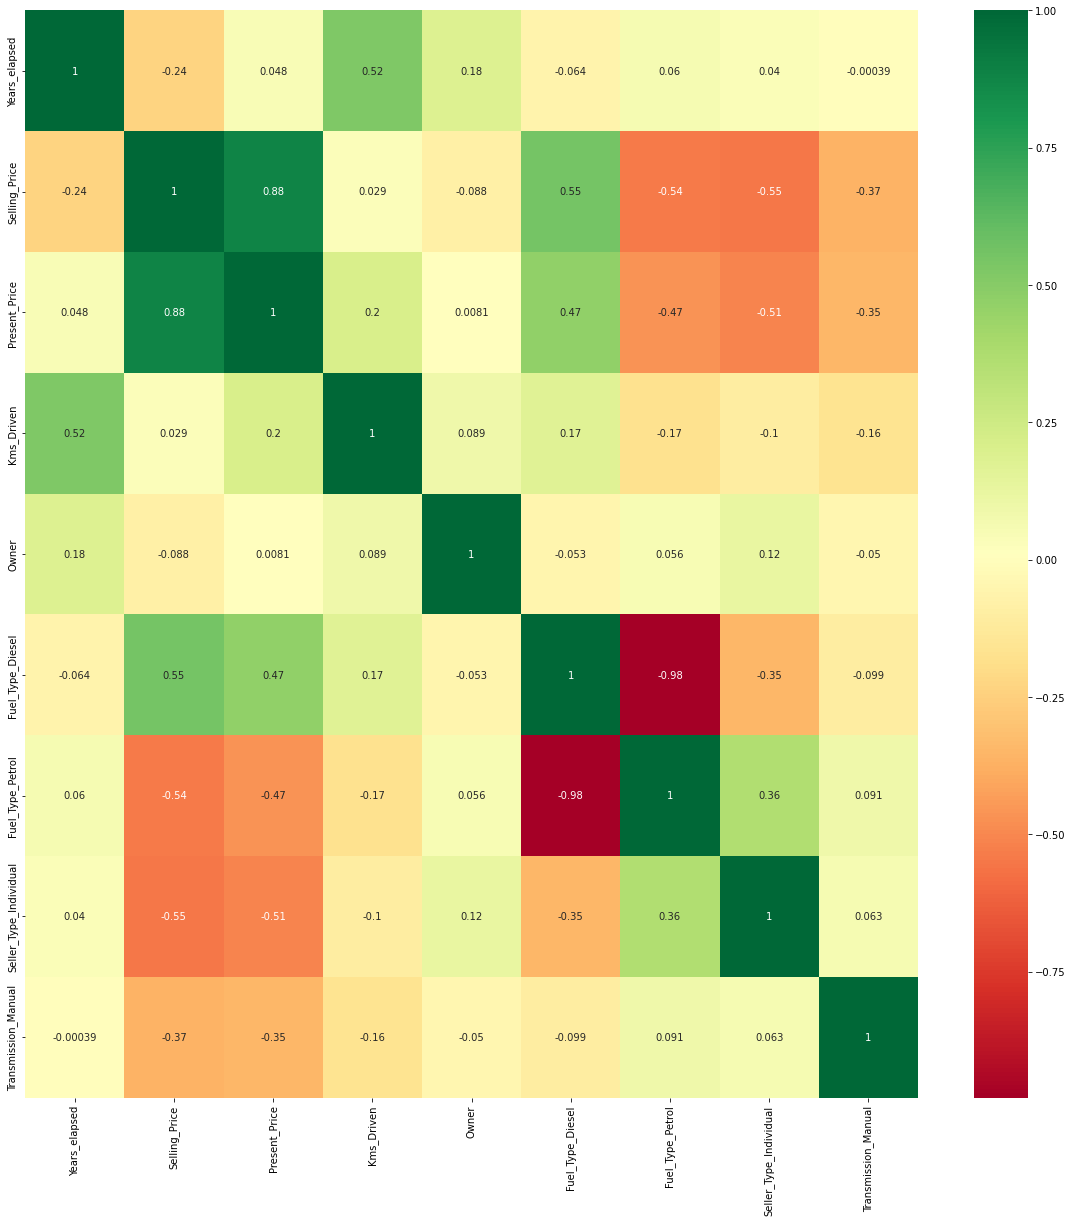

In [84]:
#Create a heat map
plt.figure(figsize = (20,20))
sns.heatmap(final_df.corr(),annot = True, cmap = 'RdYlGn')

In [86]:
#feature and target selection
X = final_df.drop('Selling_Price',axis = 1)
y = final_df['Selling_Price']

In [87]:
X.head()

,Years_elapsed,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,5.59,27000,0,0,1,0,1
1,7,9.54,43000,0,1,0,0,1
2,3,9.85,6900,0,0,1,0,1
3,9,4.15,5200,0,0,1,0,1
4,6,6.87,42450,0,1,0,0,1


In [122]:
X.columns

Index(['Years_elapsed', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [88]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [90]:
###Feature importance
from sklearn.ensemble import ExtraTreesRegressor

In [91]:
#Instantiating and creating the model
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [92]:
model.feature_importances_

array([0.07650161, 0.38725036, 0.0407408 , 0.00094429, 0.22343096,
       0.00897001, 0.13387279, 0.1282892 ])

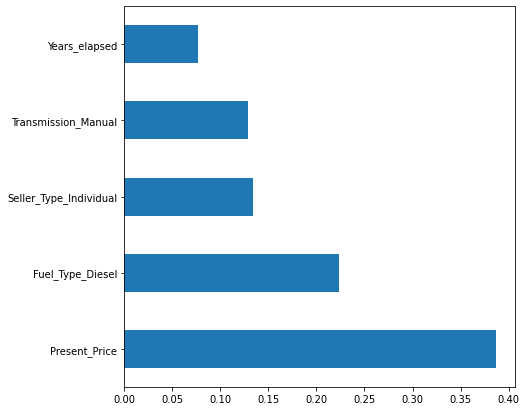

In [95]:
#Feature importance visualization
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(7,7))
feat_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [97]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

In [98]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [99]:
#Import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [106]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [107]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]#100,200,300,400....1200
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [108]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [109]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [110]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
#Display the optimal best parameters which give max performance
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [112]:
#Predict the X_test values 
y_pred = rf_random.predict(X_test)
y_pred

array([ 5.35370047,  0.56830649, 21.42562575,  7.4198493 ,  4.68702439,
       21.45863341,  5.16490833,  7.01620445,  0.43097619,  0.49645071,
        2.95933618,  5.79227927,  0.41619384,  2.91798159, 10.54116767,
       12.67379588,  5.28727361,  1.14468279,  3.8044082 ,  8.52272295,
        7.39695454, 21.21102642,  0.45698292,  4.66569425,  0.23682527,
        3.33120198,  0.70788702, 21.28350934,  5.18636511,  3.20183271,
        0.45476305,  0.32849503,  1.97222662,  5.96300285,  0.40412474,
        0.60508381,  0.25204715,  4.68149063,  5.33027295, 10.29979601,
        0.4068448 ,  0.36210174,  3.01269489, 10.85043418,  1.49872197,
        0.44799119,  5.00107245,  0.62828322,  2.20827513,  7.51766949,
        2.86246789,  4.59365675,  7.93043976,  7.8566422 ,  0.29168525,
        0.4603748 ,  4.97870612,  4.45243943,  8.87821568,  4.76462526,
        2.79883881])

<AxesSubplot:xlabel='Selling_Price'>

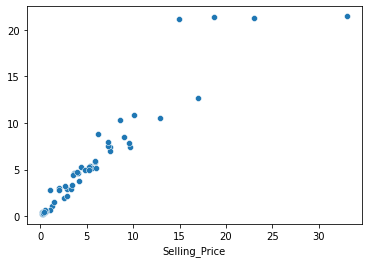

In [118]:
sns.scatterplot(x=y_test,y=y_pred)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

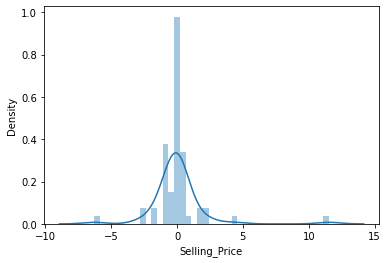

In [120]:
sns.distplot(y_test-y_pred)

The prediction vs actual values are normalized

In [121]:
import pickle
file = open("random_forest_carpred.pkl",'wb') #naming the pickle file in the "write by" mode
pickle.dump(rf_random,file) #Dumping the rf model in the file